# Figure 5

### Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

from karabo_data import RunDirectory

In [2]:
run = RunDirectory('../data//SA1/201830/p900025/raw/r0149/')

In [3]:
df = run.get_dataframe(fields=[("*_XGM/*", "*.i[xy]Pos"), ("*_XGM/*", "*.photonFlux")])

In [4]:
def plot_fig(dataframe, axis, xkey, ykey, xlabel, ylabel, xlim, ylim, verbose=True):
    x = dataframe[xkey].values
    y = dataframe[ykey].values
    
    coef = np.polyfit(x, y, deg=1)
    linear_fit = np.poly1d(coef)
    
    if verbose:
        print(f"Slope: {linear_fit[1]:.3f}, offset: {linear_fit[0]:.2f}")
    
    axis.scatter(x, y, color='red', s=1)
    axis.set_xlabel(xlabel, fontsize=14)
    axis.set_ylabel(ylabel, fontsize=14)

    axis.plot(x, linear_fit(x), color='black')

    #  Formatting
    axis.set_xlim(*xlim)
    axis.set_ylim(*ylim)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.minorticks_on()

## Figure 5

Slope: 0.965, offset: -36.25


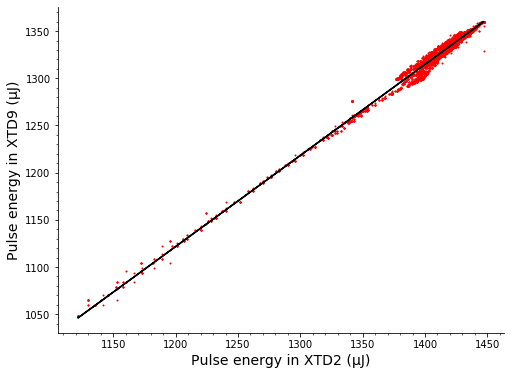

In [5]:
fig_5, ax_5 = plt.subplots(figsize=(8,6))
plot_fig(df, ax_5,
    xkey='SA1_XTD2_XGM/XGM/DOOCS/pulseEnergy.photonFlux', ykey='SPB_XTD9_XGM/XGM/DOOCS/pulseEnergy.photonFlux',
    xlabel="Pulse energy in XTD2 (μJ)", ylabel="Pulse energy in XTD9 (μJ)",
    xlim=(None, None), ylim=(None, None)
)

Simultaneous pulse energy measurements for the SASE1 beam at XTD2 and XTD9 XGM.

Note that these are averaged energy measurements and not single-shot correlations. The slope of the linear fit is 0.97 indicating a beamline transmission of 97% (no filters inserted). Data sources are XTD2 and XTD9 XGMs (SASE1), averaged ion signals of XGMDh chambers, date 15 June 2018, wavelength 0.134 nm, 60 pulses per train, both XGMs with Xe gas targets. The absolute measurement uncertainty σ of the energy was 7–10% for both XGMs.
